In [4]:
import re # using regular expression to find different seperators
from pyspark.sql.types import *
from pyspark.sql.functions import * # importing col

In [10]:
lat_longs ='s3://finalprojneil/lat_longs.txt'

In [11]:
# Loading lat_longs data
lat_longs_log=sc.textFile(lat_longs)

temp_var2 = lat_longs_log.map(lambda k:k.split())

long_lats_log_df = temp_var2.toDF().select(col("_1").alias("Latitude"), col("_2").alias("Longitude"), col("_3").alias("Url"))

long_lats_log_df = long_lats_log_df.withColumn("Latitude", long_lats_log_df["Latitude"].cast('double'))
long_lats_log_df = long_lats_log_df.withColumn("Longitude", long_lats_log_df["Longitude"].cast('double'))

#caching df
long_lats_log_df.cache()

long_lats_log_df.show(5)

[Stage 7:>                                                          (0 + 1) / 1]

+------------------+------------------+--------------------+
|          Latitude|         Longitude|                 Url|
+------------------+------------------+--------------------+
|              36.7| 3.216666666666667|<http://dbpedia.o...|
|              42.5|1.5166666666666666|<http://dbpedia.o...|
|12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
|-8.833333333333334|13.333333333333334|<http://dbpedia.o...|
|41.333333333333336|              19.8|<http://dbpedia.o...|
+------------------+------------------+--------------------+
only showing top 5 rows



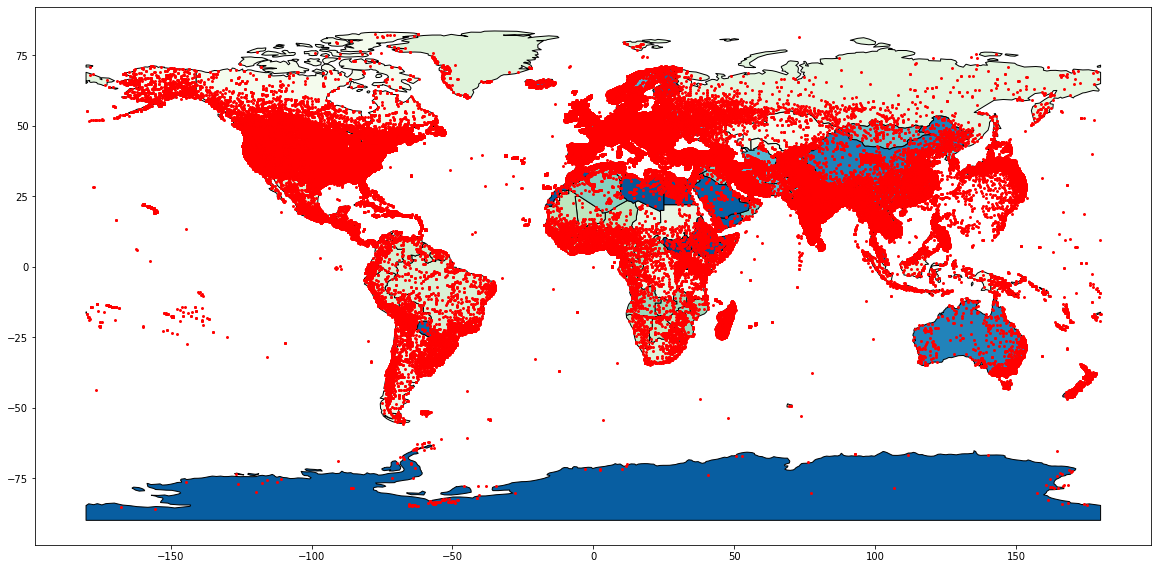

In [14]:
plot_data(long_lats_log_df, a=1)
